<h2>Model_Building</h2>

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score


In [3]:
# df2['CROP'].value_counts()

In [4]:
df=pd.read_csv('Datasets/updated_data.csv')

In [5]:
df.head()

,Unnamed: 0,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
0,0,90,42,43,20.879744,82.002744,6.502985,202.935536,Andaman and Nicobar,7000.0,Rice
1,1,85,58,41,21.770462,80.319644,7.038096,226.655537,Andaman and Nicobar,5000.0,Rice
2,2,60,55,44,23.004459,82.320763,7.840207,263.964248,Andaman and Nicobar,7000.0,Rice
3,3,74,35,40,26.491096,80.158363,6.980401,242.864034,Andaman and Nicobar,7000.0,Rice
4,4,69,37,42,23.058049,83.370118,7.073454,251.055000,Andaman and Nicobar,3500.0,Rice


In [6]:
df1=df

In [7]:
df1=df1.sample(frac=1)
df1.head()

,Unnamed: 0,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
126,126,64,35,23,23.020383,61.894720,5.680361,63.038434,Gujarat,1100.000000,Maize
475,475,14,55,15,27.335809,55.277559,8.050304,73.447753,Kerala,3500.000000,MothBeans
2170,2170,49,54,50,25.624466,93.182403,6.762522,97.263367,Uttar Pradesh,1572.055556,Papaya
105,105,62,52,16,22.275267,58.840159,6.967058,63.870206,Gujarat,825.000000,Maize
1133,1133,31,144,202,11.021054,80.555572,5.870601,68.239632,Punjab,320.000000,Grapes


In [8]:
df1.drop('Unnamed: 0', axis=1,inplace=True)
# df1.info()

In [9]:
df2=df1

In [10]:
y=df2['CROP']
x=df2.drop('CROP', axis=1)

In [11]:
x.head()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE
126,64,35,23,23.020383,61.894720,5.680361,63.038434,Gujarat,1100.000000
475,14,55,15,27.335809,55.277559,8.050304,73.447753,Kerala,3500.000000
2170,49,54,50,25.624466,93.182403,6.762522,97.263367,Uttar Pradesh,1572.055556
105,62,52,16,22.275267,58.840159,6.967058,63.870206,Gujarat,825.000000
1133,31,144,202,11.021054,80.555572,5.870601,68.239632,Punjab,320.000000


In [12]:

from sklearn.preprocessing import OneHotEncoder

categorical_feature = 'STATE'

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

encoded_data = pd.DataFrame(encoder.fit_transform(x[[categorical_feature]]))

new_column_names = encoder.get_feature_names_out([categorical_feature])

#creating new columns and appending the new encoded columns to the dataset.
for i in range(len(new_column_names)):
    x[new_column_names[i]] = encoded_data.iloc[:, i]

# Now categorical feature is one-hot encoded
print(x)


      N_SOIL  P_SOIL  K_SOIL  TEMPERATURE   HUMIDITY        ph    RAINFALL  \
126       64      35      23    23.020383  61.894720  5.680361   63.038434   
475       14      55      15    27.335809  55.277559  8.050304   73.447753   
2170      49      54      50    25.624466  93.182403  6.762522   97.263367   
105       62      52      16    22.275267  58.840159  6.967058   63.870206   
1133      31     144     202    11.021054  80.555572  5.870601   68.239632   
...      ...     ...     ...          ...        ...       ...         ...   
1140      25     121     201    30.507348  82.717756  5.594241   70.082004   
1480      29     132     204    23.089507  90.225073  6.096753  108.216660   
991      111      79      53    28.311933  75.773638  6.165001  119.695765   
209       25      78      76    17.480426  15.755940  7.228963   66.969806   
66        91      56      37    23.431916  80.568878  6.363472  269.503916   

              STATE   CROP_PRICE  STATE_Andaman and Nicobar  ..

In [13]:
x.drop('STATE', axis=1, inplace=True) # Duplicate category
x.drop('CROP_PRICE', axis=1, inplace=True) #outdated data in this field

In [14]:
x.head()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE_Andaman and Nicobar,STATE_Andhra Pradesh,STATE_Assam,...,STATE_Odisha,STATE_Pondicherry,STATE_Punjab,STATE_Rajasthan,STATE_Tamil Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar Pradesh,STATE_Uttrakhand,STATE_West Bengal
126,64,35,23,23.020383,61.894720,5.680361,63.038434,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
475,14,55,15,27.335809,55.277559,8.050304,73.447753,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2170,49,54,50,25.624466,93.182403,6.762522,97.263367,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
105,62,52,16,22.275267,58.840159,6.967058,63.870206,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1133,31,144,202,11.021054,80.555572,5.870601,68.239632,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


splitting data into Train, Validation and test

In [15]:
tr_no=int(0.7*len(x))

train_x=x[:tr_no]

test_x=x[tr_no:]

train_y=y[:tr_no]

test_y=y[tr_no:]


In [16]:
train_x

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE_Andaman and Nicobar,STATE_Andhra Pradesh,STATE_Assam,...,STATE_Odisha,STATE_Pondicherry,STATE_Punjab,STATE_Rajasthan,STATE_Tamil Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar Pradesh,STATE_Uttrakhand,STATE_West Bengal
126,64,35,23,23.020383,61.894720,5.680361,63.038434,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
475,14,55,15,27.335809,55.277559,8.050304,73.447753,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2170,49,54,50,25.624466,93.182403,6.762522,97.263367,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
105,62,52,16,22.275267,58.840159,6.967058,63.870206,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1133,31,144,202,11.021054,80.555572,5.870601,68.239632,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,78,37,22,25.342171,63.318020,6.330554,74.520820,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
845,0,67,22,29.821121,69.407321,6.593798,51.564611,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
932,40,9,41,24.377668,85.401712,5.782707,106.128338,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1562,37,23,12,31.526760,90.506218,6.395258,113.116940,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


<h3>Navie Bayes</h3>

In [17]:
model = GaussianNB()

In [18]:
model.fit(train_x, train_y)

GaussianNB()

In [19]:
test_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 1377 to 66
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   N_SOIL                     660 non-null    int64  
 1   P_SOIL                     660 non-null    int64  
 2   K_SOIL                     660 non-null    int64  
 3   TEMPERATURE                660 non-null    float64
 4   HUMIDITY                   660 non-null    float64
 5   ph                         660 non-null    float64
 6   RAINFALL                   660 non-null    float64
 7   STATE_Andaman and Nicobar  660 non-null    float64
 8   STATE_Andhra Pradesh       660 non-null    float64
 9   STATE_Assam                660 non-null    float64
 10  STATE_Chattisgarh          660 non-null    float64
 11  STATE_Goa                  660 non-null    float64
 12  STATE_Gujarat              660 non-null    float64
 13  STATE_Haryana              660 non-null    float

In [20]:
testing_y=model.predict(test_x)

In [21]:
accuracy = accuracy_score(test_y, testing_y)
precision = precision_score(test_y, testing_y, average='weighted')
recall = recall_score(test_y, testing_y, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Accuracy: 0.7606
Precision: 0.7874
Recall: 0.7606


<h3>Random Forests</h3>

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
train_x.head()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE_Andaman and Nicobar,STATE_Andhra Pradesh,STATE_Assam,...,STATE_Odisha,STATE_Pondicherry,STATE_Punjab,STATE_Rajasthan,STATE_Tamil Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar Pradesh,STATE_Uttrakhand,STATE_West Bengal
126,64,35,23,23.020383,61.894720,5.680361,63.038434,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
475,14,55,15,27.335809,55.277559,8.050304,73.447753,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2170,49,54,50,25.624466,93.182403,6.762522,97.263367,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
105,62,52,16,22.275267,58.840159,6.967058,63.870206,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1133,31,144,202,11.021054,80.555572,5.870601,68.239632,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [24]:
model1=RandomForestClassifier(n_estimators=100, random_state=42)
model1.fit(train_x, train_y)
testing_y1=model1.predict(test_x)

In [25]:
accuracy = accuracy_score(test_y, testing_y1)
precision = precision_score(test_y, testing_y1, average='weighted')
recall = recall_score(test_y, testing_y1, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.9955
Precision: 0.9955
Recall: 0.9955


<h4>Dumping this model as a pickle file in the folder</h4>

In [26]:
# pip install pickle



In [27]:
import pickle as pickle

In [28]:
pickle.dump(model1, open('RNDFRST.pkl', 'wb'))

<h4>Evaluating why Random forest did significantly better than Naive bayes (99.3% >> 84%) Accuracy</h4> 
-There are a few assumptions that naive bayes makes when making predictions<br>
        &nbsp;&nbsp;&nbsp;&nbsp; ->Gausian distribution (Since we are using the gaussian classifier)<br>
        &nbsp;&nbsp;&nbsp;&nbsp; ->The parameters/Features in the dataset are independent from one another 

In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2200 entries, 126 to 66
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N_SOIL       2200 non-null   int64  
 1   P_SOIL       2200 non-null   int64  
 2   K_SOIL       2200 non-null   int64  
 3   TEMPERATURE  2200 non-null   float64
 4   HUMIDITY     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   RAINFALL     2200 non-null   float64
 7   STATE        2200 non-null   object 
 8   CROP_PRICE   2200 non-null   float64
 9   CROP         2200 non-null   object 
dtypes: float64(5), int64(3), object(2)
memory usage: 189.1+ KB


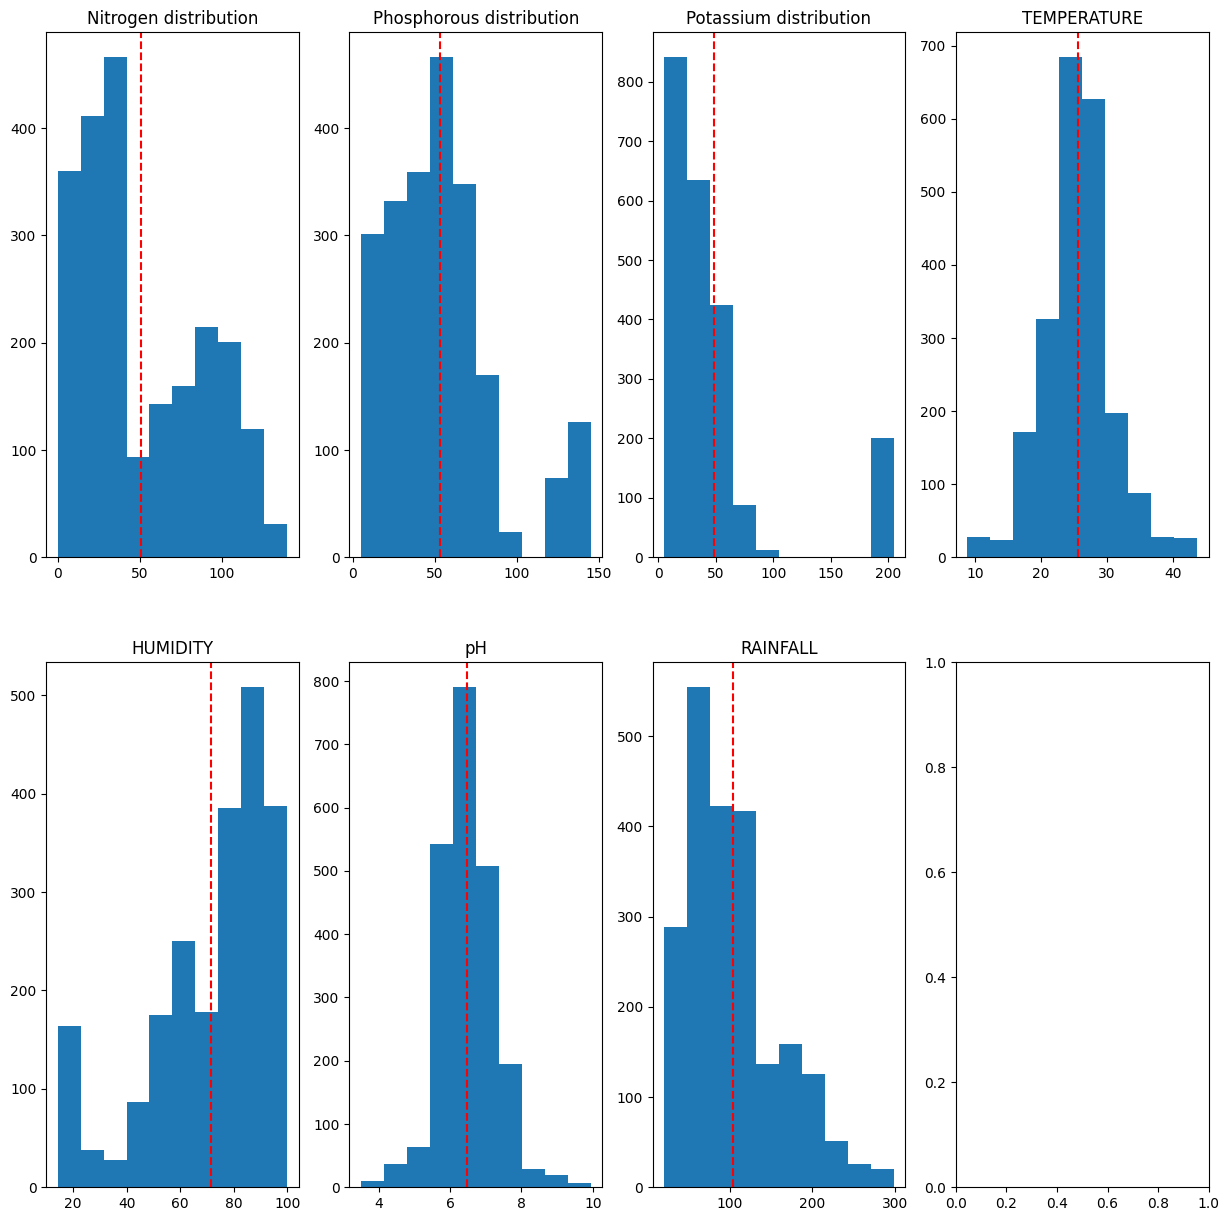

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,axes= plt.subplots(2,4, figsize=(15,15))
axes[0][0].hist(df2['N_SOIL'])
axes[0][0].axvline(x=df2['N_SOIL'].mean(), color='Red', linestyle='dashed')
axes[0][0].set_title('Nitrogen distribution')

axes[0][1].hist(df2['P_SOIL'])
axes[0][1].axvline(x=df2['P_SOIL'].mean(), color='Red', linestyle='dashed')
axes[0][1].set_title('Phosphorous distribution')

axes[0][2].hist(df2['K_SOIL'])
axes[0][2].axvline(x=df2['K_SOIL'].mean(), color='Red', linestyle='dashed')
axes[0][2].set_title('Potassium distribution')

axes[0][3].hist(df2['TEMPERATURE'])
axes[0][3].axvline(x=df2['TEMPERATURE'].mean(), color='Red', linestyle='dashed')
axes[0][3].set_title('TEMPERATURE')

axes[1][0].hist(df2['HUMIDITY'])
axes[1][0].axvline(x=df2['HUMIDITY'].mean(), color='Red', linestyle='dashed')
axes[1][0].set_title('HUMIDITY')

axes[1][1].hist(df2['ph'])
axes[1][1].axvline(x=df2['ph'].mean(), color='Red', linestyle='dashed')
axes[1][1].set_title('pH')

axes[1][2].hist(df2['RAINFALL'])
axes[1][2].axvline(x=df2['RAINFALL'].mean(), color='Red', linestyle='dashed')
axes[1][2].set_title('RAINFALL')


plt.show()


<h5>Here we can see only two features follow the normal distribution</h5>
&nbsp;&nbsp;&nbsp;&nbsp;->Temperature<br>
&nbsp;&nbsp;&nbsp;&nbsp;->pH <br><br>
which may be the reason for the poorer perfomance of the naive bayes algorithm comparetively

<h3>Employing SVM classifier </h3>  #COME BACK TO THIS LATER


Retrieving the vector/matrix with high probabilities.

In [31]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1540 entries, 126 to 260
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   N_SOIL                     1540 non-null   int64  
 1   P_SOIL                     1540 non-null   int64  
 2   K_SOIL                     1540 non-null   int64  
 3   TEMPERATURE                1540 non-null   float64
 4   HUMIDITY                   1540 non-null   float64
 5   ph                         1540 non-null   float64
 6   RAINFALL                   1540 non-null   float64
 7   STATE_Andaman and Nicobar  1540 non-null   float64
 8   STATE_Andhra Pradesh       1540 non-null   float64
 9   STATE_Assam                1540 non-null   float64
 10  STATE_Chattisgarh          1540 non-null   float64
 11  STATE_Goa                  1540 non-null   float64
 12  STATE_Gujarat              1540 non-null   float64
 13  STATE_Haryana              1540 non-null   floa

In [32]:
# df=pd.DataFrame({
#     ''
# })

In [33]:

predicted_proba = model1.predict_proba(train_x[:1])

# for i in range(4):
#     for j in range(22):
#         if(predicted_proba[i][j]>=0.2 and predicted_proba[i][j]<0.95):
#             print(f"{i}: {predicted_proba[i]}")
#             print("\n")
#             break

predicted_proba


array([[0.  , 0.01, 0.  , 0.  , 0.  , 0.01, 0.01, 0.  , 0.  , 0.  , 0.  ,
        0.95, 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.01, 0.  ]])

In [34]:
labels=model1.classes_
labels

array(['Apple', 'Banana', 'Blackgram', 'ChickPea', 'Coconut', 'Coffee',
       'Cotton', 'Grapes', 'Jute', 'KidneyBeans', 'Lentil', 'Maize',
       'Mango', 'MothBeans', 'MungBean', 'Muskmelon', 'Orange', 'Papaya',
       'PigeonPeas', 'Pomegranate', 'Rice', 'Watermelon'], dtype=object)

In [35]:
train_x

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE_Andaman and Nicobar,STATE_Andhra Pradesh,STATE_Assam,...,STATE_Odisha,STATE_Pondicherry,STATE_Punjab,STATE_Rajasthan,STATE_Tamil Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar Pradesh,STATE_Uttrakhand,STATE_West Bengal
126,64,35,23,23.020383,61.894720,5.680361,63.038434,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
475,14,55,15,27.335809,55.277559,8.050304,73.447753,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2170,49,54,50,25.624466,93.182403,6.762522,97.263367,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
105,62,52,16,22.275267,58.840159,6.967058,63.870206,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1133,31,144,202,11.021054,80.555572,5.870601,68.239632,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,78,37,22,25.342171,63.318020,6.330554,74.520820,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
845,0,67,22,29.821121,69.407321,6.593798,51.564611,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
932,40,9,41,24.377668,85.401712,5.782707,106.128338,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1562,37,23,12,31.526760,90.506218,6.395258,113.116940,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


<h2>Encoding the user inputs</h2>

In [36]:

n=50
p=75
k=50
t=45
h=100
ph=10
r=170
s="Andhra Pradesh"
columns=train_x.columns.to_list()
columns=columns[7:]
dataf={'N_SOIL':n,
    'P_SOIL':p,
    'K_SOIL':k,
    'TEMPERATURE':t,
    'HUMIDITY':h,
    'ph':ph,
    'RAINFALL': r}
dataf=pd.DataFrame(dataf, index=['new_data'])

for c in columns:
    if(c==f"STATE_{s}"):
        dataf[c]=1.0
    else:
        dataf[c]=0.0

dataf
    



,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE_Andaman and Nicobar,STATE_Andhra Pradesh,STATE_Assam,...,STATE_Odisha,STATE_Pondicherry,STATE_Punjab,STATE_Rajasthan,STATE_Tamil Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar Pradesh,STATE_Uttrakhand,STATE_West Bengal
new_data,50,75,50,45,100,10,170,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
resp=model1.predict(dataf)


<h1>Implementing Explainability</h1>
<h3>->PDP (partial dependence plots)</h3>
<h3>->SHAP (Shapley additive explainations)<h3>

In [38]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


<h4> Below code provides all possible crops for soil</h4> 

In [39]:
prob=model1.predict_proba(dataf)
probab=prob[0]
indices=probab.argsort()[::-1][:2] #to find the index of 2 largest probabilites in prediction

crop1= model1.classes_[indices[0]]

if (probab[indices[0]]-probab[indices[1]])<0.2:
    crop2=model1.classes_[indices[1]]
    print(f"The crops that are most suitable for your soil are {crop1} and {crop2}")

# probab[indices[0]]



In [40]:
model1.classes_

array(['Apple', 'Banana', 'Blackgram', 'ChickPea', 'Coconut', 'Coffee',
       'Cotton', 'Grapes', 'Jute', 'KidneyBeans', 'Lentil', 'Maize',
       'Mango', 'MothBeans', 'MungBean', 'Muskmelon', 'Orange', 'Papaya',
       'PigeonPeas', 'Pomegranate', 'Rice', 'Watermelon'], dtype=object)

Displaying the explainability

c:\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


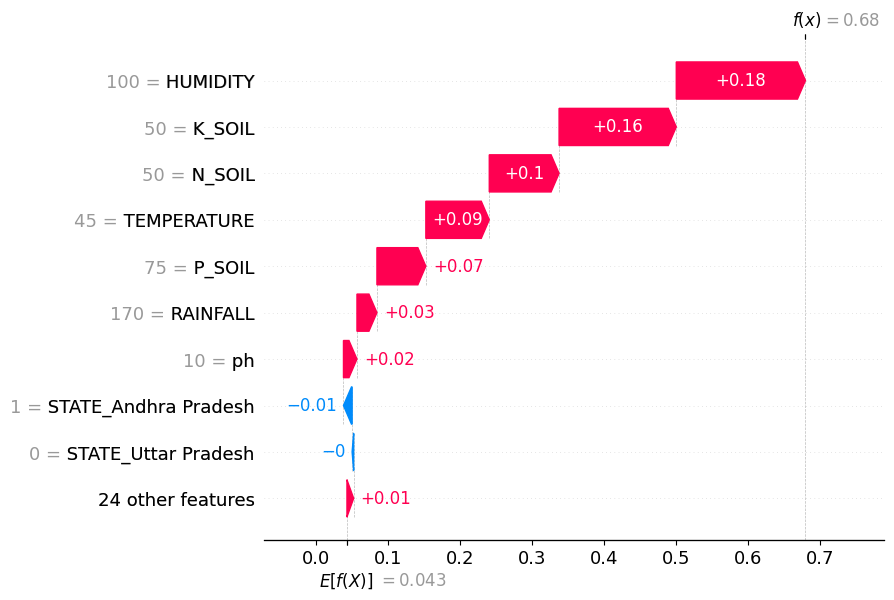

In [41]:
import matplotlib.pyplot as plt

import shap
shap.initjs()


explainer=shap.Explainer(model1)

shap_values=explainer(dataf)

shap.plots.waterfall(shap_values[0,:,indices[0]])

# shap.plots.waterfall(shap_values[0,:,indices[1]])





In [42]:
shap_values[0,:,indices[0]]


.values =
array([ 9.70116407e-02,  6.79727728e-02,  1.62879439e-01,  8.81424263e-02,
        1.79544748e-01,  1.87509761e-02,  2.77544601e-02,  2.77463854e-04,
       -1.20270201e-02,  5.22565231e-04,  4.77210179e-05,  1.29257467e-05,
        1.19242401e-03,  1.61672759e-04,  7.71562080e-04,  1.32813912e-05,
        1.07836232e-03, -5.44803987e-04,  5.73013856e-04,  1.52715722e-03,
       -1.97040502e-04, -1.55096935e-04, -6.68738278e-05,  7.44884501e-04,
        1.69203578e-04,  1.35900735e-03,  7.45827763e-05,  8.12207027e-04,
        3.90139730e-04,  2.56260073e-04, -2.13716851e-03,  5.52992783e-04,
       -2.58094462e-04])

.base_values =
0.042792207792207805

.data =
array([ 50.,  75.,  50.,  45., 100.,  10., 170.,   0.,   1.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.])

<H3>Partial dependency plot</h3>

In [43]:
from sklearn.inspection import plot_partial_dependence


c:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


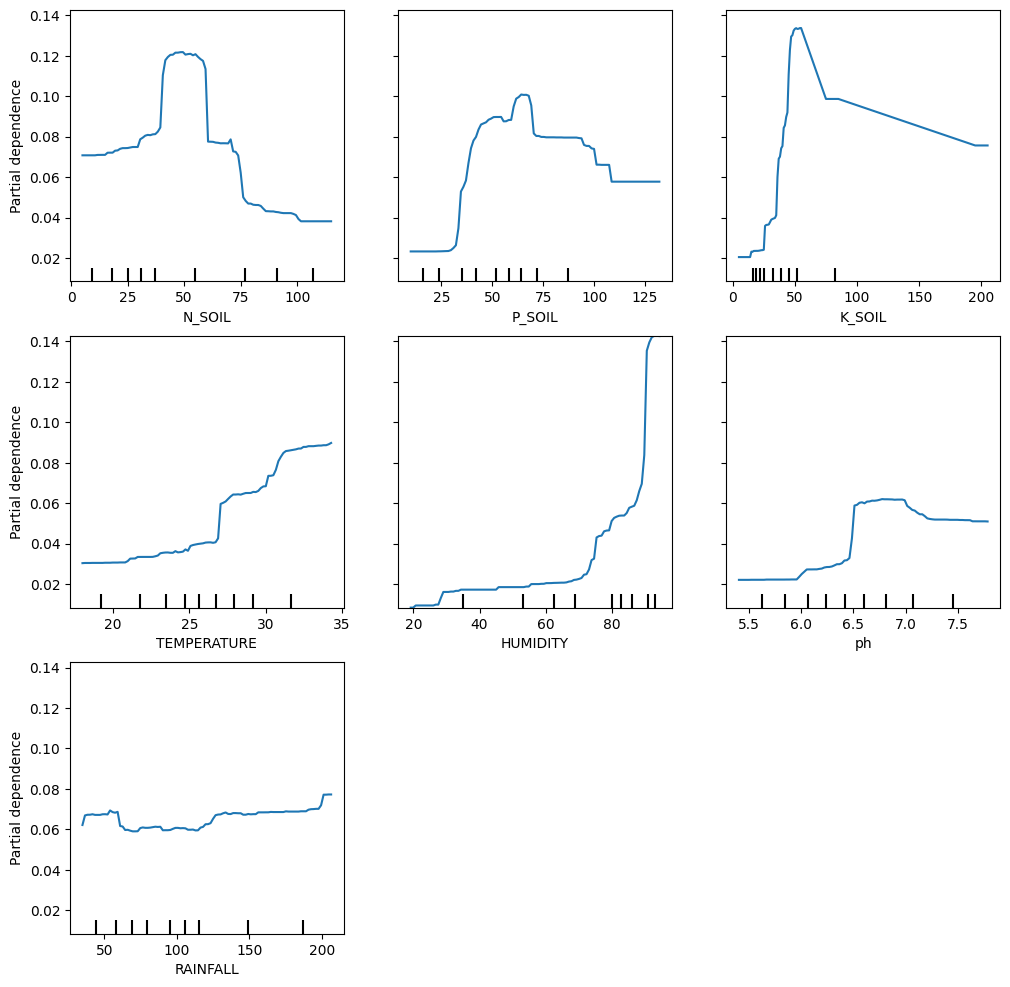

In [50]:
fig, ax = plt.subplots(figsize=(12, 12))
plot_partial_dependence(model1 ,train_x ,dataf.columns.to_list()[:7],target=model1.classes_[indices[0]], ax=ax)
# fig, ax = plt.subplots(figsize=(12, 12))
# plot_partial_dependence(model1 ,train_x ,dataf.columns.to_list()[:7],target=model1.classes_[indices[1]], ax=ax)
# plt.show()
plt.savefig('subplots.png', format='png', dpi=300)

<h4>The above plot shows how changes in soil affects the growth of the recommended crop</h4>

In [ ]:
model1.classes_[indices[0]] 


'Papaya'